In [2]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 42
pd.set_option('display.max_columns', None)

In [4]:
fraud_data=pd.read_csv("/content/Fraud_data.csv")
In_pat=pd.read_csv("/content/Inpatientdata.csv")
Out_pat=pd.read_csv("/content/Outpatientdata.csv")
Beneficiary=pd.read_csv("/content/Beneficiarydata.csv")

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [6]:
In_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [7]:
Out_pat.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119605 entries, 0 to 119604
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  119605 non-null  object 
 1   ClaimID                 119605 non-null  object 
 2   ClaimStartDt            119605 non-null  object 
 3   ClaimEndDt              119605 non-null  object 
 4   Provider                119605 non-null  object 
 5   InscClaimAmtReimbursed  119605 non-null  int64  
 6   AttendingPhysician      119290 non-null  object 
 7   OperatingPhysician      20880 non-null   object 
 8   OtherPhysician          44948 non-null   object 
 9   ClmDiagnosisCode_1      117195 non-null  object 
 10  ClmDiagnosisCode_2      74298 non-null   object 
 11  ClmDiagnosisCode_3      46844 non-null   object 
 12  ClmDiagnosisCode_4      28927 non-null   object 
 13  ClmDiagnosisCode_5      17135 non-null   object 
 14  ClmDiagnosisCode_6  

In [8]:
Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [9]:
Beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [10]:
##Replacing 2 with 0 for chronic conditions, and renal to 0 and 1 
Beneficiary = Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Beneficiary = Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [11]:
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,1,44,230,12,12,0,1,0,0,0,0,1,0,0,0,0,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660


In [12]:
##Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)
Beneficiary['DOB'] = pd.to_datetime(Beneficiary['DOB'] , format = '%Y-%m-%d')
Beneficiary['DOD'] = pd.to_datetime(Beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
Beneficiary['Age'] = round(((Beneficiary['DOD'] - Beneficiary['DOB']).dt.days)/365)

In [13]:
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,NaN
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,NaN
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,NaN
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,NaN
5,BENE11006,1976-09-01,NaT,2,1,0,23,810,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0,NaN
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0
7,BENE11008,1934-02-01,NaT,2,1,0,15,140,12,12,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0,NaN
8,BENE11009,1929-06-01,NaT,1,1,1,44,230,12,12,0,1,0,0,0,0,1,0,0,0,0,0,0,100,0,NaN
9,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,NaN


In [14]:
##Calculate age based on 2009-12-01
Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Beneficiary['DOB']).dt.days)/365),inplace=True)

In [15]:
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,74.0
5,BENE11006,1976-09-01,NaT,2,1,0,23,810,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0,33.0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0
7,BENE11008,1934-02-01,NaT,2,1,0,15,140,12,12,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0,76.0
8,BENE11009,1929-06-01,NaT,1,1,1,44,230,12,12,0,1,0,0,0,0,1,0,0,0,0,0,0,100,0,81.0
9,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,73.0


In [16]:
##wheather dead
Beneficiary.loc[Beneficiary.DOD.isna(),'WhetherDead']=0
Beneficiary.loc[Beneficiary.DOD.notna(),'WhetherDead']=1

In [17]:
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0,0.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,74.0,0.0
5,BENE11006,1976-09-01,NaT,2,1,0,23,810,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0,33.0,0.0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0,1.0
7,BENE11008,1934-02-01,NaT,2,1,0,15,140,12,12,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0,76.0,0.0
8,BENE11009,1929-06-01,NaT,1,1,1,44,230,12,12,0,1,0,0,0,0,1,0,0,0,0,0,0,100,0,81.0,0.0
9,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,73.0,0.0


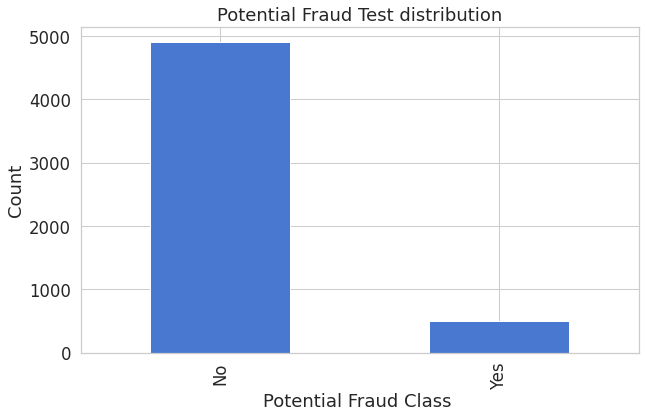

In [18]:
plt.title("Potential Fraud Test distribution")
fraud_data.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Potential Fraud Class ')
plt.ylabel('Count')
plt.show()

In [19]:
fraud_data.groupby( ["PotentialFraud"] ).Provider.count()

PotentialFraud
No     4904
Yes     506
Name: Provider, dtype: int64

In [20]:
df=pd.concat([In_pat,Out_pat])
df=pd.merge(df,fraud_data,on="Provider",how="outer")
df=df.fillna(0)

In [21]:
df.head(50)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,0,0,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000.0,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,0.0,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000.0,PHY334706,PHY334706,0,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,0.0,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000.0,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,0,0,0,8154.0,0.0,0.0,0.0,0.0,0.0,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000.0,PHY380413,PHY432598,0,2009-01-08,1748,1068.0,2009-01-12,593,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,0.0,Yes
5,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000.0,PHY418191,PHY370861,0,2009-06-22,5180,1068.0,2009-06-25,184,1623,5180,496,4660,4019,42731,E8788,53081,42611,32723,3327.0,0.0,0.0,0.0,0.0,0.0,Yes
6,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000.0,PHY318892,0,0,2009-03-11,7231,1068.0,2009-03-19,095,3501,2724,70715,42822,25060,3599,7802,41401,82525,0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
7,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000.0,PHY319720,PHY392080,PHY380413,2009-02-10,43491,1068.0,2009-03-03,940,V5789,5849,78830,V4589,2859,4019,78820,7993,40390,0,3995.0,0.0,0.0,0.0,0.0,0.0,Yes
8,BENE31905,CLM49964,2009-05-06,2009-05-09,PRV55912,7000.0,PHY340849,0,0,2009-05-06,78609,1068.0,2009-05-09,248,4280,5119,1629,41401,4589,V854,7564,4148,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
9,BENE31905,CLM77968,2009-12-01,2009-12-05,PRV55912,7000.0,PHY410728,0,0,2009-12-01,5781,1068.0,2009-12-05,341,5579,2761,6822,6953,7140,25000,2768,60000,4019,0,0.0,0.0,0.0,0.0,0.0,0.0,Yes


In [22]:
#Label categorical data
from sklearn import preprocessing
catcols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

le = {}
X = df[catcols].astype(str)
for i in catcols:
    print(i)
    le[i] = preprocessing.LabelEncoder()
    le[i].fit(X[i].astype(str))
    df[i] = le[i].transform(df[i].astype(str))

BeneID
ClaimID
ClaimStartDt
ClaimEndDt
Provider
AttendingPhysician
OperatingPhysician
OtherPhysician
AdmissionDt
ClmAdmitDiagnosisCode
DischargeDt
DiagnosisGroupCode
ClmDiagnosisCode_1
ClmDiagnosisCode_2
ClmDiagnosisCode_3
ClmDiagnosisCode_4
ClmDiagnosisCode_5
ClmDiagnosisCode_6
ClmDiagnosisCode_7
ClmDiagnosisCode_8
ClmDiagnosisCode_9
ClmDiagnosisCode_10
ClmProcedureCode_1
ClmProcedureCode_2
ClmProcedureCode_3
ClmProcedureCode_4
ClmProcedureCode_5
ClmProcedureCode_6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160533 entries, 0 to 160532
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  160533 non-null  int64  
 1   ClaimID                 160533 non-null  int64  
 2   ClaimStartDt            160533 non-null  int64  
 3   ClaimEndDt              160533 non-null  int64  
 4   Provider                160533 non-null  int64  
 5   InscClaimAmtReimbursed  160533 non-null  float64
 6   AttendingPhysician      160533 non-null  int64  
 7   OperatingPhysician      160533 non-null  int64  
 8   OtherPhysician          160533 non-null  int64  
 9   AdmissionDt             160533 non-null  int64  
 10  ClmAdmitDiagnosisCode   160533 non-null  int64  
 11  DeductibleAmtPaid       160533 non-null  float64
 12  DischargeDt             160533 non-null  int64  
 13  DiagnosisGroupCode      160533 non-null  int64  
 14  ClmDiagnosisCode_1  

In [24]:
##prepare data
cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

X = df[cols]
Y = df["PotentialFraud"].apply(lambda x: True if x == "Yes" else False)

In [25]:
Y

0          True
1          True
2          True
3          True
4          True
          ...  
160528    False
160529    False
160530    False
160531    False
160532    False
Name: PotentialFraud, Length: 160533, dtype: bool

In [26]:
## Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=12)

In [27]:
clf = xgb.XGBClassifier(n_jobs=12, n_estimators=500)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=["auc","error","logloss"],
        verbose=10)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73993	validation_0-error:0.29934	validation_0-logloss:0.63907	validation_1-auc:0.73886	validation_1-error:0.30105	validation_1-logloss:0.63955
[10]	validation_0-auc:0.89468	validation_0-error:0.17621	validation_0-logloss:0.46918	validation_1-auc:0.88980	validation_1-error:0.17939	validation_1-logloss:0.47316
[20]	validation_0-auc:0.93561	validation_0-error:0.13595	validation_0-logloss:0.40446	validation_1-auc:0.93341	validation_1-error:0.13778	validation_1-logloss:0.40712
[30]	validation_0-auc:0.95515	validation_0-error:0.10621	validation_0-logloss:0.35697	validation_1-auc:0.95273	validation_1-error:0.10838	validation_1-logloss:0.35999
[40]	validation_0-auc:0.96810	validation_0-error:0.08774	validation_0-logloss:0.31962	validation_1-auc:0.96569	validation_1-error:0.08814	validation_1-logloss:0.32285
[50]	validation_0-auc:0.97273	validation_0-error:0.08056	validation_0-logloss:0.29957	validation_1-auc:0.97037	validation_1-error:0.08129	validation_1-logloss:0.30310

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=12, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

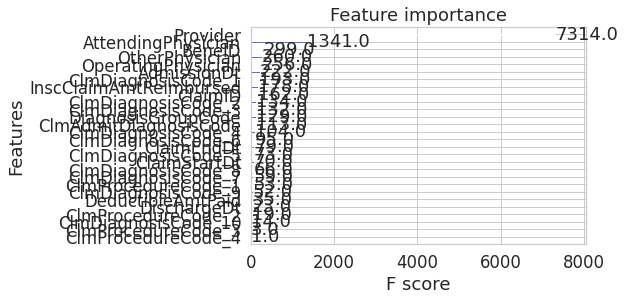

In [28]:
from xgboost import plot_importance
plot_importance(clf)

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot


In [30]:
xgb_probs=clf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)

In [31]:
xgb_probs

array([[0.01407719, 0.9859228 ],
       [0.98404896, 0.01595107],
       [0.9907994 , 0.00920057],
       ...,
       [0.04156822, 0.9584318 ],
       [0.9901854 , 0.00981462],
       [0.94681275, 0.05318728]], dtype=float32)

In [32]:
xgb_probs=xgb_probs[:,1]

In [33]:
xgb_probs

array([0.9859228 , 0.01595107, 0.00920057, ..., 0.9584318 , 0.00981462,
       0.05318728], dtype=float32)

In [34]:
xgb_auc=roc_auc_score(y_test,xgb_probs)


In [35]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))

No Skill: ROC AUC=0.500
XGB: ROC AUC=1.000


In [36]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)


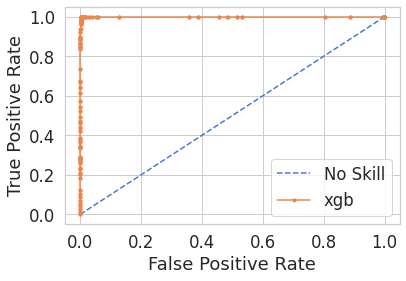

In [37]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='xgb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [38]:
cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

X = df[cols]
Y = df["PotentialFraud"].apply(lambda x: True if x == "Yes" else False)

In [39]:
Y

0          True
1          True
2          True
3          True
4          True
          ...  
160528    False
160529    False
160530    False
160531    False
160532    False
Name: PotentialFraud, Length: 160533, dtype: bool

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [41]:
clf = xgb.XGBClassifier(n_jobs=12, n_estimators=500)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=["auc","error","logloss"],
        verbose=10)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.62108	validation_0-error:0.36858	validation_0-logloss:0.67171	validation_1-auc:0.61700	validation_1-error:0.37268	validation_1-logloss:0.67271
[10]	validation_0-auc:0.70397	validation_0-error:0.32538	validation_0-logloss:0.61827	validation_1-auc:0.68977	validation_1-error:0.33456	validation_1-logloss:0.62511
[20]	validation_0-auc:0.74614	validation_0-error:0.29705	validation_0-logloss:0.59406	validation_1-auc:0.72538	validation_1-error:0.31188	validation_1-logloss:0.60521
[30]	validation_0-auc:0.77718	validation_0-error:0.27714	validation_0-logloss:0.57315	validation_1-auc:0.75346	validation_1-error:0.29320	validation_1-logloss:0.58710
[40]	validation_0-auc:0.79317	validation_0-error:0.26463	validation_0-logloss:0.56007	validation_1-auc:0.76552	validation_1-error:0.28398	validation_1-logloss:0.57698
[50]	validation_0-auc:0.80350	validation_0-error:0.25668	validation_0-logloss:0.55173	validation_1-auc:0.76920	validation_1-error:0.27937	validation_1-logloss:0.57291

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=12, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

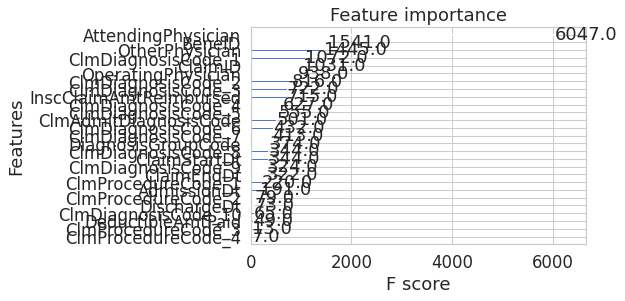

In [42]:
plot_importance(clf)

In [43]:
xgb_probs=clf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
xgb_probs=xgb_probs[:,1]
xgb_auc=roc_auc_score(y_test,xgb_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.862


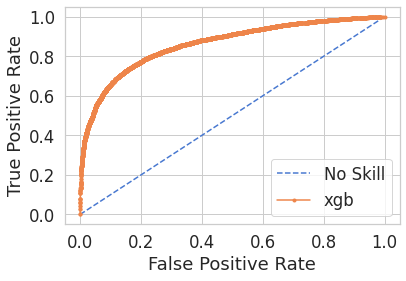

In [44]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='xgb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [45]:
##add beneficiary info and improve In pat abd out pat combine
In_pat['AdmissionDt'] = pd.to_datetime(In_pat['AdmissionDt'] , format = '%Y-%m-%d')
In_pat['DischargeDt'] = pd.to_datetime(In_pat['DischargeDt'] , format = '%Y-%m-%d')
In_pat['AdmitForDays'] = ((In_pat['DischargeDt'] - In_pat['AdmissionDt']).dt.days)+1

In [46]:
print(Out_pat.columns)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [47]:
df1=pd.merge(Out_pat,In_pat,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [48]:
df1.shape

(160079, 31)

In [49]:
df1=pd.merge(df1,Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [50]:
df1.shape

(160079, 57)

In [51]:
df1=pd.merge(df1,fraud_data,on="Provider",how="outer")

In [52]:
df1.isnull().sum()*100/len(df1)

BeneID                               0.282808
ClaimID                              0.282808
ClaimStartDt                         0.282808
ClaimEndDt                           0.282808
Provider                             0.000000
InscClaimAmtReimbursed               0.282808
AttendingPhysician                   0.548797
OperatingPhysician                  72.149029
OtherPhysician                      69.079255
ClmDiagnosisCode_1                   1.784057
ClmDiagnosisCode_2                  28.646447
ClmDiagnosisCode_3                  46.028542
ClmDiagnosisCode_4                  57.723957
ClmDiagnosisCode_5                  65.916665
ClmDiagnosisCode_6                  70.841509
ClmDiagnosisCode_7                  74.611451
ClmDiagnosisCode_8                  77.752238
ClmDiagnosisCode_9                  81.097967
ClmDiagnosisCode_10                 97.389322
ClmProcedureCode_1                  85.561847
ClmProcedureCode_2                  96.596961
ClmProcedureCode_3                

Text(0, 0.5, 'Number of PotentialFraud per Class ')

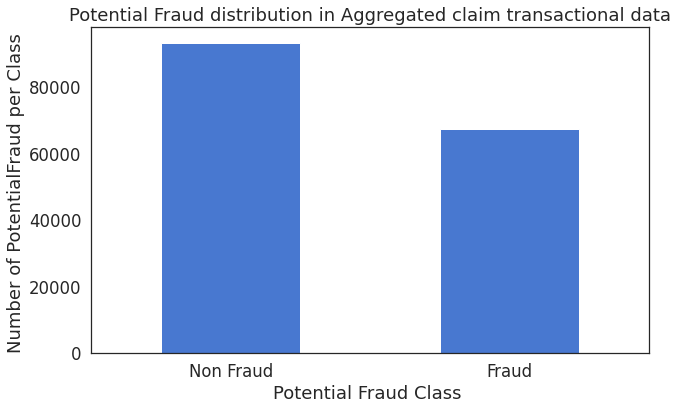

In [53]:
import seaborn as sns
sns.set_style('white',rc={'figure.figsize':(12,8)})
LABELS = ["Non Fraud", "Fraud"]
pd.value_counts(df1['PotentialFraud'], sort = True).plot(kind='bar',rot=0,figsize = (10,6))
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")


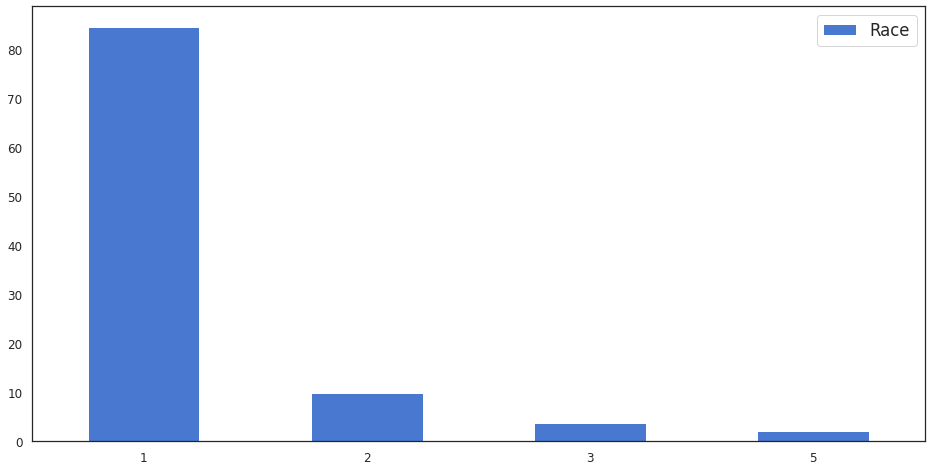

In [54]:
##race
race_count=pd.value_counts(Beneficiary['Race'],sort=True)
(race_count*100/len(Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)
plt.show()

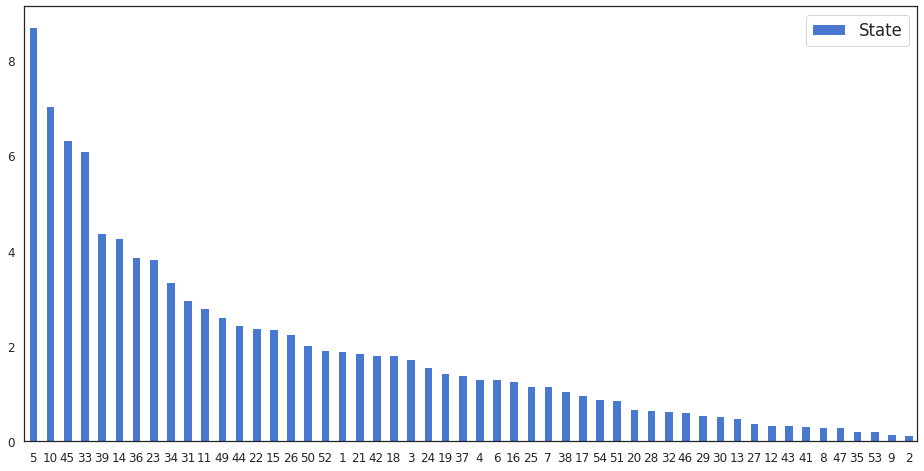

In [55]:
#states
states_count=pd.value_counts(Beneficiary['State'],sort=True)
(states_count*100/len(Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)
plt.show()

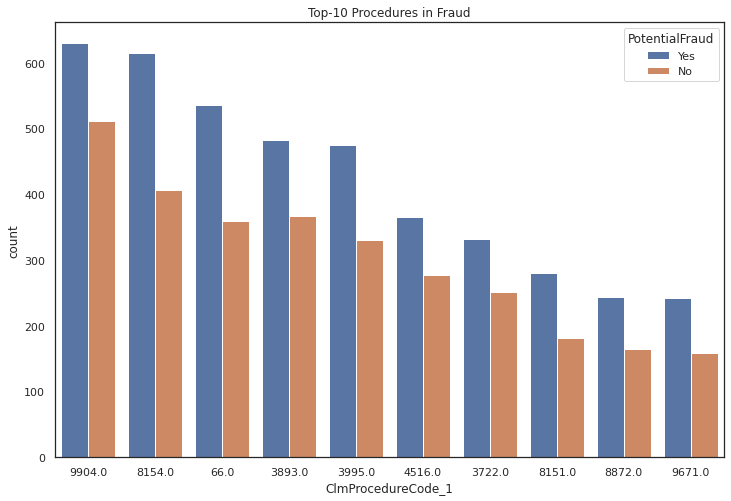

In [56]:
##top procedures
sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=df1
              ,order=df1.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures in Fraud')
    
plt.show()



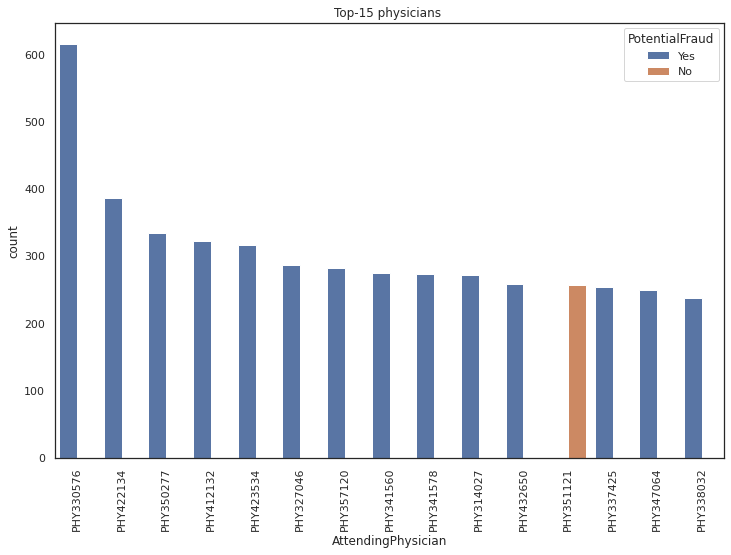

In [57]:
## top physicians


ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=df1
              ,order=df1.AttendingPhysician.value_counts().iloc[:15].index)

    
plt.title('Top-15 physicians ')
plt.xticks(rotation=90)
plt.show()



In [58]:
##create numeric average columns by provider
df1["PerProviderAvg_InscClaimAmtReimbursed"]=df1.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
df1["PerProviderAvg_DeductibleAmtPaid"]=df1.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
df1["PerProviderAvg_IPAnnualReimbursementAmt"]=df1.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerProviderAvg_IPAnnualDeductibleAmt"]=df1.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerProviderAvg_OPAnnualReimbursementAmt"]=df1.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerProviderAvg_OPAnnualDeductibleAmt"]=df1.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerProviderAvg_Age"]=df1.groupby('Provider')['Age'].transform('mean')
df1["PerProviderAvg_NoOfMonths_PartACov"]=df1.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
df1["PerProviderAvg_NoOfMonths_PartBCov"]=df1.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
df1["PerProviderAvg_AdmitForDays"]=df1.groupby('Provider')['AdmitForDays'].transform('mean')

In [59]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN,1936-09-01,NaT,2.0,1.0,0,39.0,280.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,50.0,73.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20.0,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40.0,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160528,NaN,NaN,NaN,NaN,PRV57752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160529,NaN,NaN,NaN,NaN,PRV57753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [60]:
##create numeric average columns by BENEId
df1["PerBeneIDAvg_InscClaimAmtReimbursed"]=df1.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
df1["PerBeneIDAvg_DeductibleAmtPaid"]=df1.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
df1["PerBeneIDAvg_IPAnnualReimbursementAmt"]=df1.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerBeneIDAvg_IPAnnualDeductibleAmt"]=df1.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerBeneIDAvg_OPAnnualReimbursementAmt"]=df1.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerBeneIDAvg_OPAnnualDeductibleAmt"]=df1.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerBeneIDAvg_AdmitForDays"]=df1.groupby('BeneID')['AdmitForDays'].transform('mean')

In [61]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN,1936-09-01,NaT,2.0,1.0,0,39.0,280.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,50.0,73.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,30.000000,0.0,0.0,0.0,30.0,50.0,NaN
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20.0,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40.0,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [62]:
##create numeric average columns by physician
df1["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=df1.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
df1["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=df1.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
df1["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=df1.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=df1.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=df1.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=df1.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerOperatingPhysicianAvg_AdmitForDays"]=df1.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [63]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN,1936-09-01,NaT,2.0,1.0,0,39.0,280.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,50.0,73.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,30.000000,0.0,0.0,0.0,30.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20.0,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1810.0,760.0,87.0,0.0,Yes,246.564673,2.447844,6198.692629,565.557719,1993.991655,563.073713,75.040334,11.816412,11.974965,NaN,150.833333,0.0,0.0,0.0,1810.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40.0,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaT,1.0,1.0,0,39.0,270.0,12.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,

In [64]:
##create numeric average columns by DiagnosisGroupCode
df1["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=df1.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=df1.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=df1.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=df1.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=df1.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=df1.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerDiagnosisGroupCodeAvg_AdmitForDays"]=df1.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [65]:
##create numeric average columns by ClmAdmitDiagnosisCode
df1["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=df1.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=df1.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=df1.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=df1.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=df1.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=df1.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=df1.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160533 entries, 0 to 160532
Data columns (total 96 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   BeneID                                                160079 non-null  object        
 1   ClaimID                                               160079 non-null  object        
 2   ClaimStartDt                                          160079 non-null  object        
 3   ClaimEndDt                                            160079 non-null  object        
 4   Provider                                              160533 non-null  object        
 5   InscClaimAmtReimbursed                                160079 non-null  float64       
 6   AttendingPhysician                                    159652 non-null  object        
 7   OperatingPhysician                                    44710 non-n

In [67]:
df1["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=df1.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_1Avg_AdmitForDays"]=df1.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

df1["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=df1.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_2Avg_AdmitForDays"]=df1.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

df1["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=df1.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_3Avg_AdmitForDays"]=df1.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

df1["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=df1.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmDiagnosisCode_4Avg_AdmitForDays"]=df1.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

df1["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=df1.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
df1["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_1Avg_AdmitForDays"]=df1.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

df1["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=df1.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
df1["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_2Avg_AdmitForDays"]=df1.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

df1["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=df1.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
df1["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=df1.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
df1["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=df1.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
df1["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=df1.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
df1["PerClmProcedureCode_3Avg_AdmitForDays"]=df1.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


<ipython-input-67-71a4d6fd1020>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df1["PerClmProcedureCode_3Avg_AdmitForDays"]=df1.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


In [68]:
df1["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"].isnull().sum()

159567

In [69]:
df1.shape

(160533, 145)

In [70]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualRe

In [71]:
##replace all null by 0
num_cols=df1.select_dtypes([np.number]).columns


df1[num_cols]=df1[num_cols].fillna(value=0)

In [72]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualRe

In [73]:
df1.isnull().sum()

BeneID                                               454
ClaimID                                              454
ClaimStartDt                                         454
ClaimEndDt                                           454
Provider                                               0
                                                    ... 
PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt      0
PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt         0
PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt      0
PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt         0
PerClmProcedureCode_3Avg_AdmitForDays                  0
Length: 145, dtype: int64

In [74]:
##select features
cols=df1.columns
cols[:58]

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressi

In [75]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']
df1=df1.drop(axis=1,columns=remove_columns)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160533 entries, 0 to 160532
Columns: 114 entries, Provider to PerClmProcedureCode_3Avg_AdmitForDays
dtypes: float64(111), object(3)
memory usage: 144.9+ MB


In [77]:
df1

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,P

In [78]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160533 entries, 0 to 160532
Data columns (total 114 columns):
 #    Column                                                Dtype  
---   ------                                                -----  
 0    Provider                                              object 
 1    InscClaimAmtReimbursed                                float64
 2    DeductibleAmtPaid                                     float64
 3    AdmitForDays                                          float64
 4    Gender                                                float64
 5    Race                                                  float64
 6    RenalDiseaseIndicator                                 object 
 7    NoOfMonths_PartACov                                   float64
 8    NoOfMonths_PartBCov                                   float64
 9    ChronicCond_Alzheimer                                 float64
 10   ChronicCond_Heartfailure                              float64
 11 

In [79]:
df1.Gender=df1.Gender.astype('category')
df1.Race=df1.Race.astype('category')

In [80]:
df1=pd.get_dummies(df1,columns=['Gender','Race'],drop_first=True)

In [81]:
df1

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedu

In [82]:
df1.replace(['Yes','No'],['1','0'],inplace=True)
df1['PotentialFraud']=df1.PotentialFraud.astype('int64')

In [83]:
##aggregation for each provider
df1=df1.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
df1

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_AdmitForDa

In [84]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 117 columns):
 #    Column                                                Dtype  
---   ------                                                -----  
 0    Provider                                              object 
 1    PotentialFraud                                        int64  
 2    InscClaimAmtReimbursed                                float64
 3    DeductibleAmtPaid                                     float64
 4    AdmitForDays                                          float64
 5    NoOfMonths_PartACov                                   float64
 6    NoOfMonths_PartBCov                                   float64
 7    ChronicCond_Alzheimer                                 float64
 8    ChronicCond_Heartfailure                              float64
 9    ChronicCond_KidneyDisease                             float64
 10   ChronicCond_Cancer                                    float64
 11   Ch

In [85]:
X=df1.drop(axis=1,columns=['Provider','PotentialFraud'])
Y=df1['PotentialFraud']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12)

In [87]:
print(X_train.shape)
print(y_train.shape)

(3787, 115)
(3787,)


In [88]:
##logistic

from sklearn.linear_model import LogisticRegressionCV

logic=LogisticRegressionCV(cv=10,class_weight='balanced',random_state=111)
logic.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=111)

No Skill: ROC AUC=0.500
logic: ROC AUC=0.892


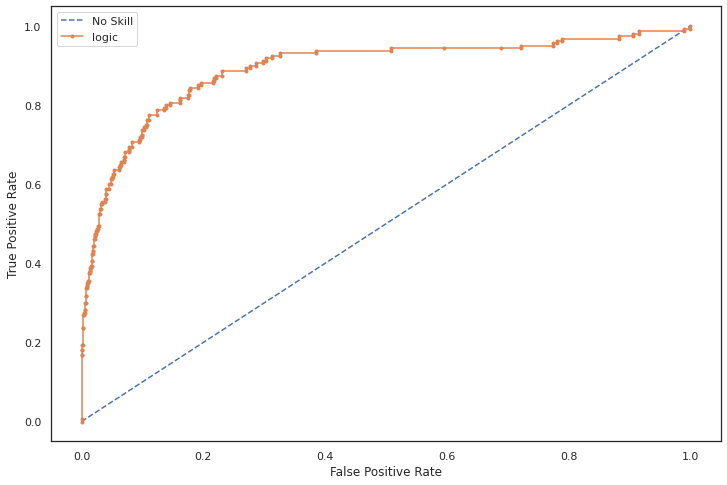

In [89]:

logic_probs=logic.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
logic_probs=logic_probs[:,1]
logic_auc=roc_auc_score(y_test,logic_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('logic: ROC AUC=%.3f' % (logic_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logic_fpr, logic_tpr, _ = roc_curve(y_test, logic_probs)


pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(logic_fpr, logic_tpr, marker='.', label='logic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


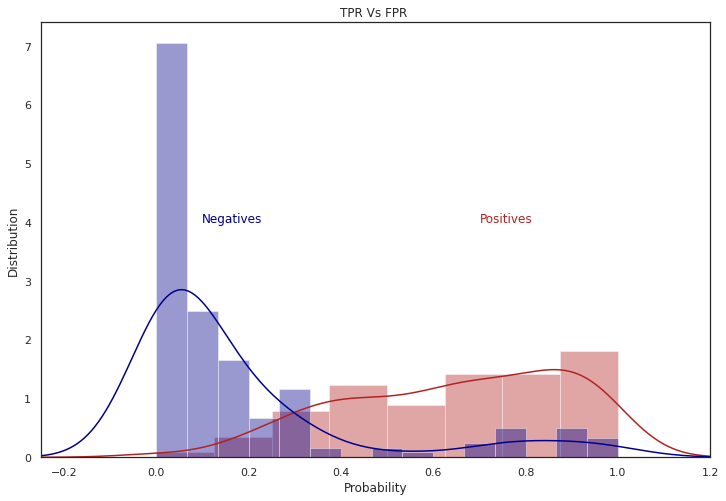

In [90]:
fig = plt.figure(figsize=(12,8))

sns.distplot(logic_tpr,color='firebrick')

sns.distplot(logic_fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [91]:
log_train_pred_60=(logic.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(logic.predict_proba(X_test)[:,1]>0.60).astype(bool)

In [93]:
from sklearn.metrics import cohen_kappa_score
cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)


KappaValue=cohen_kappa_score(y_test, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, log_val_pred_60)

print("AUC         :",AUC)


Confusion Matrix Train : 
 [[ 313   33]
 [ 570 2871]]
Confusion Matrix Test: 
 [[ 131   29]
 [ 247 1216]]
Kappa Value : 0.4044939339071063
AUC         : 0.8249594155844158


In [94]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=101,max_depth=4)

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=101)

No Skill: ROC AUC=0.500
rf: ROC AUC=0.927


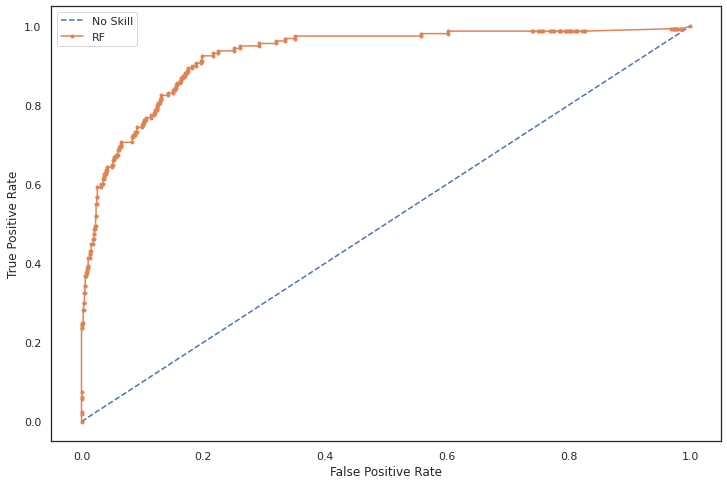

In [95]:
rf_probs=rf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
rf_probs=rf_probs[:,1]
rf_auc=roc_auc_score(y_test,rf_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('rf: ROC AUC=%.3f' % (rf_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RF')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


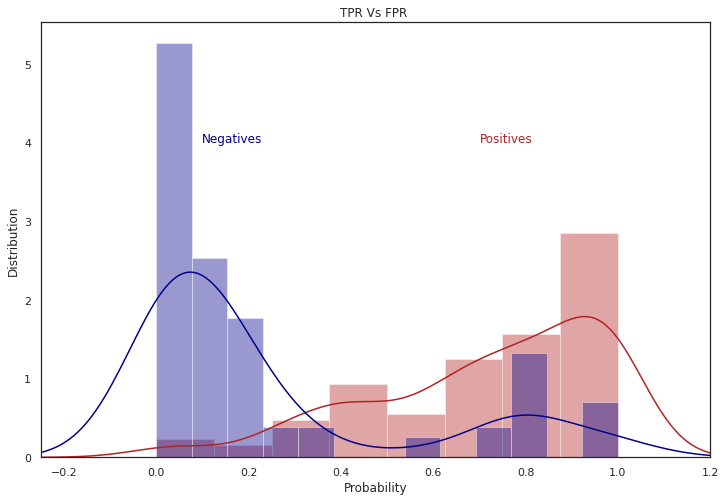

In [96]:
fig = plt.figure(figsize=(12,8))

sns.distplot(rf_tpr,color='firebrick')

sns.distplot(rf_fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [97]:
rf_train_pred_50=(rf.predict_proba(X_train)[:,1]>0.50).astype(bool)
rf_val_pred_50=(rf.predict_proba(X_test)[:,1]>0.50).astype(bool)
cm0 = confusion_matrix(y_train, rf_train_pred_50,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, rf_val_pred_50,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)


KappaValue=cohen_kappa_score(y_test, rf_val_pred_50)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, rf_val_pred_50)

print("AUC         :",AUC)

Confusion Matrix Train : 
 [[ 310   36]
 [ 359 3082]]
Confusion Matrix Test: 
 [[ 126   34]
 [ 177 1286]]
Kappa Value : 0.4767627874570849
AUC         : 0.8332578605604921


In [99]:
##XGB
clf = xgb.XGBClassifier(n_jobs=12, n_estimators=500)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=["auc","error","logloss"],
        verbose=10)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.93582	validation_0-error:0.04595	validation_0-logloss:0.47648	validation_1-auc:0.88594	validation_1-error:0.07763	validation_1-logloss:0.49106
[10]	validation_0-auc:0.99116	validation_0-error:0.01980	validation_0-logloss:0.08882	validation_1-auc:0.92286	validation_1-error:0.07394	validation_1-logloss:0.18640
[20]	validation_0-auc:0.99771	validation_0-error:0.01373	validation_0-logloss:0.06293	validation_1-auc:0.92152	validation_1-error:0.07517	validation_1-logloss:0.18947
[30]	validation_0-auc:0.99978	validation_0-error:0.00422	validation_0-logloss:0.04460	validation_1-auc:0.91898	validation_1-error:0.07270	validation_1-logloss:0.19975
[40]	validation_0-auc:1.00000	validation_0-error:0.00079	validation_0-logloss:0.03129	validation_1-auc:0.91872	validation_1-error:0.07517	validation_1-logloss:0.20646
[50]	validation_0-auc:1.00000	validation_0-error:0.00026	validation_0-logloss:0.02303	validation_1-auc:0.91845	validation_1-error:0.07640	validation_1-logloss:0.21145

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=12, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

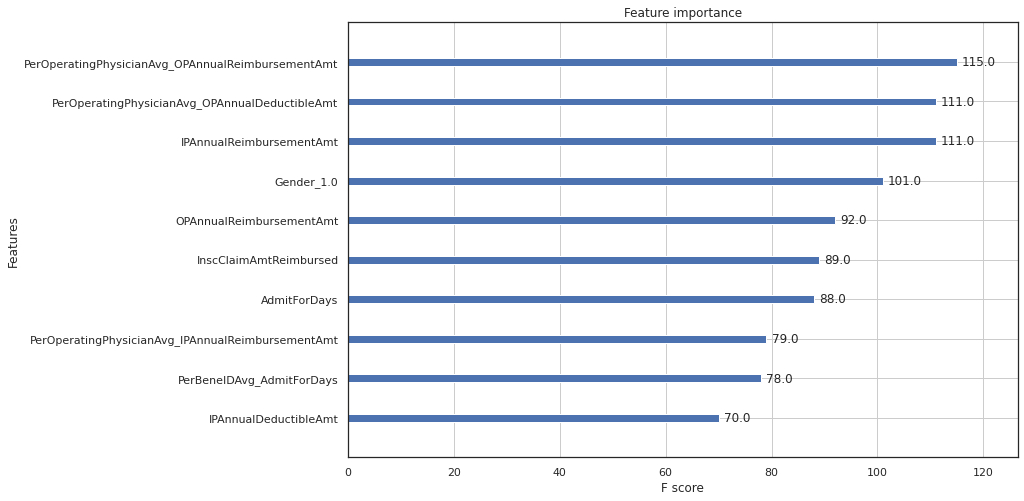

In [100]:
plot_importance(clf,max_num_features=10)

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.902


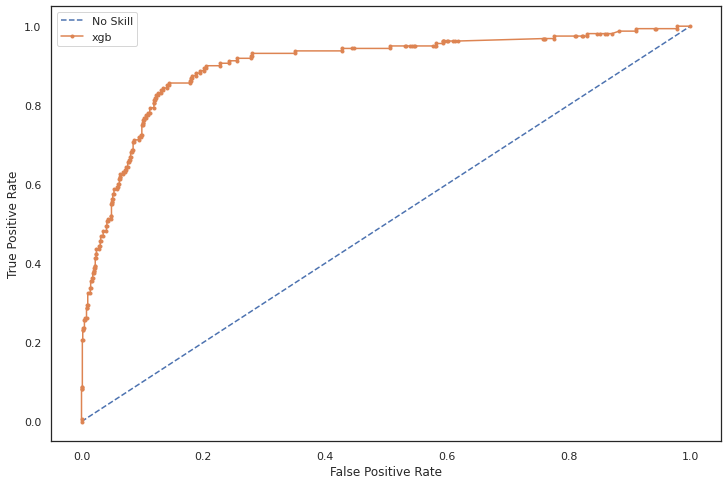

In [101]:
xgb_probs=clf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
xgb_probs=xgb_probs[:,1]
xgb_auc=roc_auc_score(y_test,xgb_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='xgb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


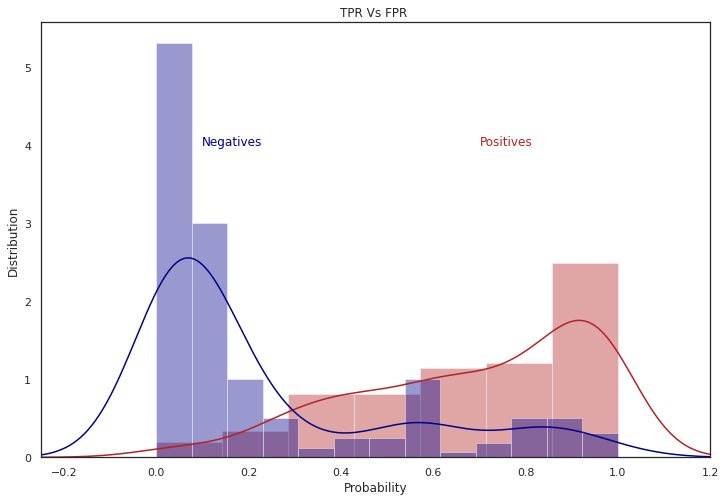

In [102]:
fig = plt.figure(figsize=(12,8))

sns.distplot(xgb_tpr,color='firebrick')

sns.distplot(xgb_fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [103]:
xgb_train_pred_50=(clf.predict_proba(X_train)[:,1]>0.50).astype(bool)
xgb_val_pred_50=(clf.predict_proba(X_test)[:,1]>0.50).astype(bool)
cm0 = confusion_matrix(y_train, xgb_train_pred_50,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_test, xgb_val_pred_50,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)


KappaValue=cohen_kappa_score(y_test, xgb_val_pred_50)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, xgb_val_pred_50)

print("AUC         :",AUC)

Confusion Matrix Train : 
 [[ 346    0]
 [   0 3441]]
Confusion Matrix Test: 
 [[  70   90]
 [  38 1425]]
Kappa Value : 0.48116402433542127
AUC         : 0.705762987012987
